In [132]:
#1 Read Auto Data
import pandas as pd
import numpy as np
import seaborn as sb
np.random.seed(1234)


df = pd.read_csv('Auto.csv')
print(df.head())
print("Dimensions: ", df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Dimensions:  (392, 9)


In [133]:
#2 Data Exploration
df.describe()
#Range
  #mpg: 37
  #cylinders: 5
  #disp.: 387
  #hrspwr: 284
  #weight: 3527
  #acclr.: 16.8
  #year: 12
  #origin: 2
#Mean
  #mpg:23.45
  #cylinders: 5.47
  #disp.: 194.41
  #hrspwr: 104.47
  #weight: 2977.58
  #acclr.: 15.55
  #year:76
  #origin: 1.58

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,391.000000,390.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.554220,76.010256,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.750548,3.668093,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.800000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [134]:
#3 Explore Data Types
df.dtypes

df.cylinders = df.cylinders.astype('category').cat.codes 
df.origin = df.origin.astype('category')

df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

In [135]:
#4 Deal with NAs
acc_mean = np.mean(df.acceleration)
df.acceleration.fillna(acc_mean, inplace = True)

year_mean = np.mean(df.year)
df.year.fillna(year_mean, inplace = True)

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [136]:
#5 Modify Columns
mpg_mean = np.mean(df.mpg)

df['mpg_high'] = np.where(
    df['mpg'] > mpg_mean, 1, 0 
    #np.where (df['mpg'] > mpg_mean, 1)
)

df.mpg_high = df.mpg_high.astype('category')

#df.describe()
df = df.drop(columns=['mpg', 'name']) #always reread data to run this block again
#df.describe()
print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504      12.00000  70.0      1   
1          4         350.0         165    3693      11.50000  70.0      1   
2          4         318.0         150    3436      11.00000  70.0      1   
3          4         304.0         150    3433      12.00000  70.0      1   
4          4         302.0         140    3449      15.55422  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
4        0  


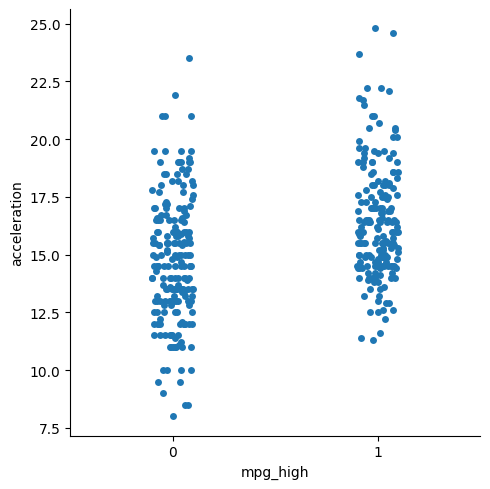

In [137]:
#6 Data Exploration w/ Graphs
sb.catplot(x = 'mpg_high', y = 'acceleration', data = df)

Vehicles with miles per gallon at or below average tend to yield a marginally lower acceleration average

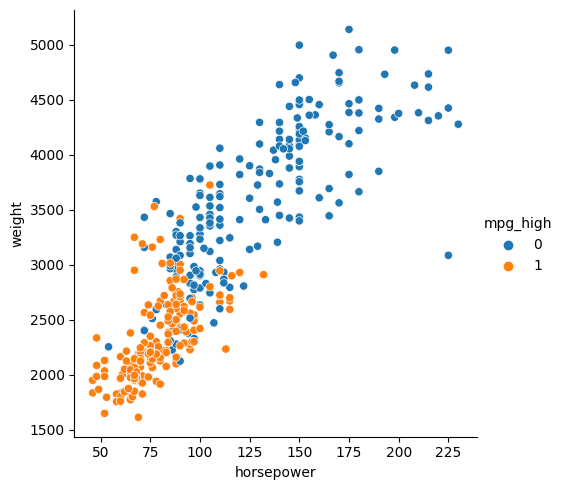

In [138]:
sb.relplot(x ='horsepower', y ='weight', data = df, hue = 'mpg_high')

Vehicles over the average miles per gallon tend to weigh less than those at or under the average

<Axes: xlabel='mpg_high', ylabel='weight'>

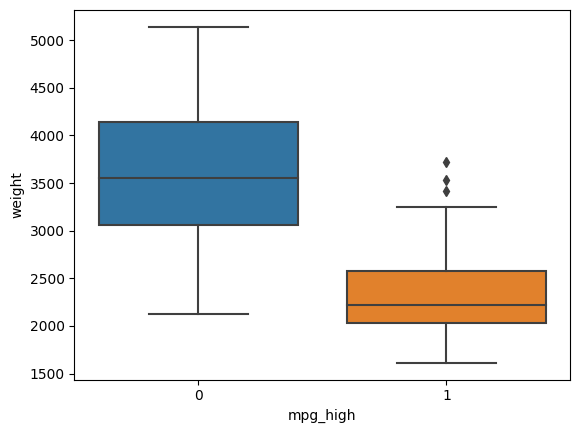

In [139]:
sb.boxplot(x = 'mpg_high', y = 'weight', data = df)

There are a few vehicles exceeding the average weight for vehicles with more efficient mileage, but they are outliers

In [140]:
#7 Train/Test Split
#i = np.random.rand(len(df)) < 0.8
#train = df[i]
#test = df[~i]
#print("Train: ", train.shape)
#print("Test: ", test.shape)

#print(train.dtypes)
#print("\n")
#print(test.dtypes)

from sklearn.model_selection import train_test_split

X = df.loc[:, ['cylinders', 'displacement', 'horsepower']]
y = df.weight

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

print("Test: ", X_train.shape)
print("Train: ", X_test.shape)

Test:  (313, 3)
Train:  (79, 3)


In [141]:
#8 LogReg
from sklearn.linear_model import LogisticRegression

df_lr = LogisticRegression(solver='lbfgs', max_iter=500)
df_lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = df_lr.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1: ', f1_score(y_test, pred, average='micro'))

Accuracy:  0.0
Precision:  0.0
Recall:  0.0
F1:  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
#9 Decision Tree
from sklearn.tree import DecisionTreeClassifier

df_dt = DecisionTreeClassifier()
df_dt.fit(X_train, y_train)

pred = df_dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1: ', f1_score(y_test, pred, average='micro'))

Accuracy:  0.012658227848101266
Precision:  0.012658227848101266
Recall:  0.012658227848101266
F1:  0.012658227848101266


In [143]:
#10 NN
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

df_nn1 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
df_nn1.fit(X_train, y_train)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1: ', f1_score(y_test, pred, average='micro'))
print("\n")

df_nn2 = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(4, 4), max_iter=700, random_state=1234)
df_nn2.fit(X_train, y_train)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='micro'))
print('Recall: ', recall_score(y_test, pred, average='micro'))
print('F1: ', f1_score(y_test, pred, average='micro'))

Accuracy:  0.012658227848101266
Precision:  0.012658227848101266
Recall:  0.012658227848101266
F1:  0.012658227848101266


Accuracy:  0.012658227848101266
Precision:  0.012658227848101266
Recall:  0.012658227848101266
F1:  0.012658227848101266


Performance can't be propery measured at this point due to a possible issue with how/what values are being read

A.) So far, the Decision Tree performed better than the other algorithms purely due to logistic reasons.
B.) Currently, the only algorithm that outputs classification metrics is the Decision Tree.
C.) Decision Trees work best when we are looking for outcomes based on choices, something that can be seen a little with how mileage affected acceleration and other columns. Logistic Regression works best when we want to infer information from data, which is kind of what we sought out to do in this notebook. Neural Networks work best when they have been extensively trained, meaning that the first few iterations will usually yield more innaccurate values.
D.) SKLearn felt a little more natural and to the point for me, mainly because I've used this library and editor before. Besides these factors, not having to run into the issues of downloading each individual library was a breath of fresh air.